In [1]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import warnings
from copy import deepcopy
import scipy
import random
from sklearn.neighbors import NearestNeighbors

In [2]:
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [3]:
def dist(a,b):
    return np.linalg.norm(a-b)

In [4]:
#random 100 points
x = np.zeros([100,2])
x[:,0] = np.random.uniform(0.00,100.00,100)
x[:,1] = np.random.uniform(0.00,100.00,100)
x

array([[  8.08472689,  15.75039598],
       [ 97.95574062,  19.610781  ],
       [ 93.21813233,  46.54284236],
       [ 61.78424178,  44.49359308],
       [  3.6678229 ,   7.59887043],
       [ 25.05960031,  61.6830587 ],
       [ 95.953446  ,  44.81347316],
       [ 88.92640635,  40.70007344],
       [ 27.04286629,  89.22745456],
       [ 30.86220969,  79.22906313],
       [  1.90450741,  48.88191043],
       [ 71.26217849,  88.75503497],
       [  4.67049524,  62.85962082],
       [ 94.01097483,  40.03085144],
       [ 19.1262488 ,  41.34414568],
       [ 39.29070969,  83.83013374],
       [ 25.76377062,  82.94979088],
       [ 53.10548899,   5.92569082],
       [ 90.51092691,   5.43678049],
       [ 10.39562257,  58.04536651],
       [ 77.76597165,  50.96377442],
       [ 94.51451501,  43.3359613 ],
       [ 97.97777364,   8.59502594],
       [ 59.42699321,  54.73978735],
       [ 63.88183299,   5.04541244],
       [ 38.69796647,  27.93586863],
       [ 14.1973847 ,  56.98267472],
 

In [5]:
#to find number of clusters, k
#initialize 1000000 points(x_t) inside the 100x100 box
#check if point in x_t lies inside the circle(of point in x)

x_t = np.zeros([100000,2])
x_t[:,0] = np.random.randint(0.00,100.00,100000)
x_t[:,1] = np.random.randint(0.00,100.00,100000)
count = 0
store = scipy.spatial.distance.cdist(x_t,x,metric='euclidean')
dist_tempo = 0.00
for i in range(len(x_t)):
    min_dist_index = np.argmin(store[i])
    dist_tempo = dist(x[min_dist_index],x_t[i])
    if (dist_tempo <= 10):
        count = count + 1

cov_area = (count / 100000.00) * 10000.00   #total area = 100*100, total points deployed = 1,000,000
cov_area

k_new = cov_area / (math.pi*100.00)

In [48]:
cov_area

8989.1

In [7]:
#initiate k random centroids over the data set
k = 29
c = np.zeros([k,2])
c[:,0] = np.random.uniform(0.00,100.00,k)
c[:,1] = np.random.uniform(0.00,100.00,k)

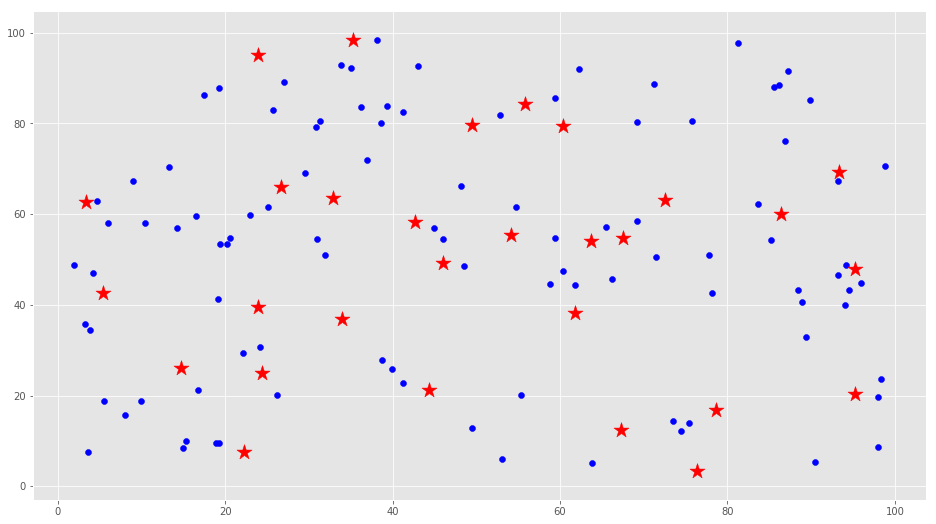

In [8]:
#plot data and initial centroids
plt.scatter(x[:,0],x[:,1],c='b')
plt.scatter(c[:,0],c[:,1],marker = '*', c='red', s=250)
plt.show()

In [9]:
#decide m -> fuzziness index or fuzzifier
#m = 1 is k means, we take m = 2
m=2
m2 = 2.0/(m-1)

In [10]:
#to store memebership of each element in each cluster
u = np.zeros([len(x), k])
#to store updated centroid coordinates
v = np.zeros(c.shape)
#copy initial set of coordinates to V
v = deepcopy(c)
v

array([[ 86.45646986,  60.02265694],
       [ 24.42512567,  24.96276079],
       [ 32.90839637,  63.4599104 ],
       [ 93.33151513,  69.33675141],
       [ 26.68595944,  66.00118733],
       [  3.39407545,  62.67615427],
       [ 23.93217227,  95.14420862],
       [  5.4617014 ,  42.54609482],
       [ 61.76242284,  38.23049085],
       [ 76.30695863,   3.27773062],
       [ 44.4085438 ,  21.20378053],
       [ 63.6671484 ,  53.98878353],
       [ 60.36096038,  79.39967656],
       [ 35.31342137,  98.33302701],
       [ 72.56828002,  63.21919785],
       [ 42.65024317,  58.24088749],
       [ 22.29639225,   7.55540723],
       [ 67.31289435,  12.399977  ],
       [ 54.14675284,  55.5073567 ],
       [ 95.23508898,  47.88394438],
       [ 45.99301196,  49.32242307],
       [ 33.93984376,  36.96419219],
       [ 55.83769756,  84.29376818],
       [ 49.43654138,  79.65779836],
       [ 23.92826603,  39.52585171],
       [ 14.66755061,  26.07231722],
       [ 67.48577676,  54.80954667],
 

In [35]:
d1=d2=d3=d4=0.0
for i in range(len(x)):
    d1=0.0
    for j in range(k):
        d1 = dist(x[i],v[j])
        d4 = 0.0
        for l in range(k):
            d2 = d1 / dist(x[i], v[l])
            d4 += d2
        u[i,j] = 1/(d4**m2)
f1=f2=f3=f4=0.0
for j in range(k):
    f4 = 0.0
    f2 = 0.0
    for i in range(len(x)):
        f1 = u[i,j]**m
        f2 += f1
        f3 = f1*x[i]
        f4 += f3
    v[j] = f4/f2

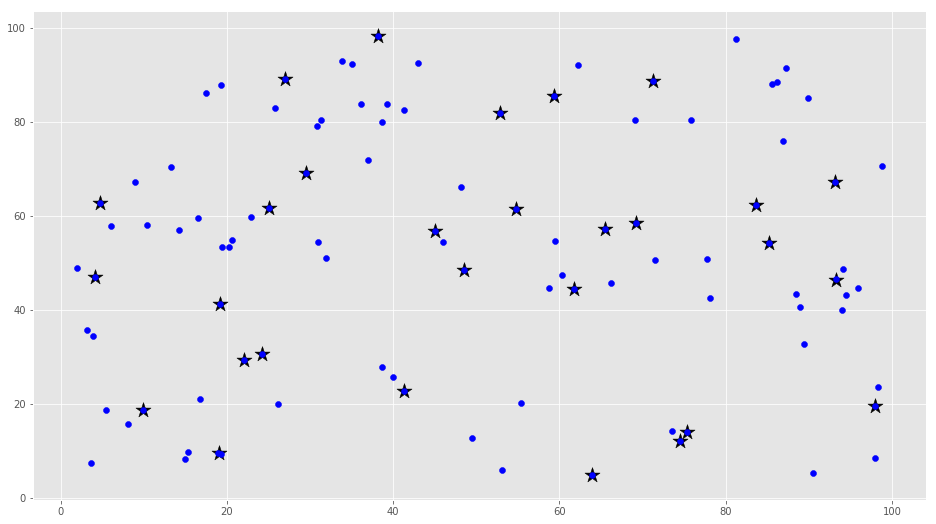

In [36]:
#new(black) and old(red) centroids
plt.scatter(v[:,0],v[:,1],c='black', marker = '*', s=250)
plt.scatter(x[:,0],x[:,1],c='b')
#plt.scatter(c[:,0],c[:,1],marker = '*', c='red', s=150)
plt.show()

In [37]:
#clustering the data points based on euclidean distance to final centroids

cluster = [[0 for x_1 in range(0)] for y_1 in range(k)]
v_n = deepcopy(v)

for i in range(len(x)):
    d_min = 1000.00
    index = 0
    for j in range(k):
        d = dist(x[i],v_n[j])
        if(d<d_min):
            d_min = d
            index = j
    cluster[index].append(x[i])

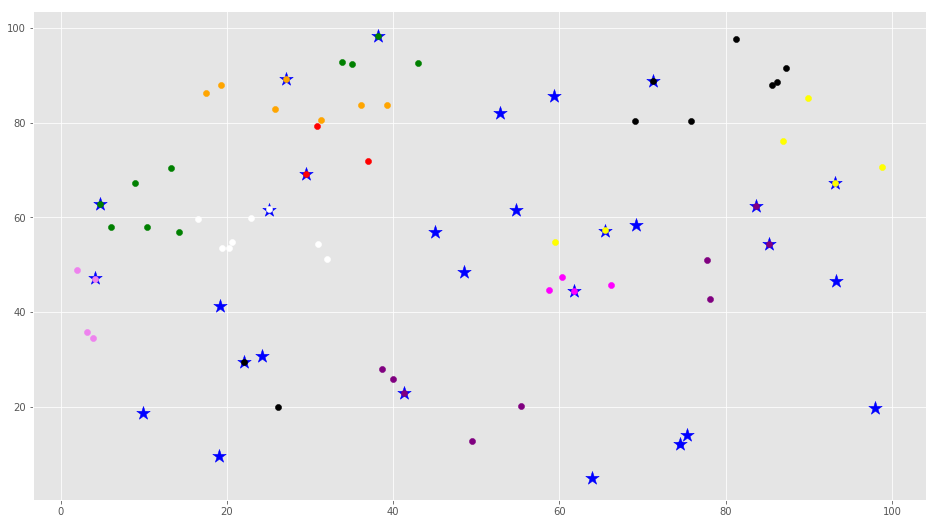

In [38]:
#just to plot each cluster with different color:
    
c_1= np.empty_like(cluster[0])
c_1[:] = cluster[0]
c_2= np.empty_like(cluster[1])
c_2[:] = cluster[1]
c_3= np.empty_like(cluster[2])
c_3[:] = cluster[2]
c_4= np.empty_like(cluster[3])
c_4[:] = cluster[3]
c_5= np.empty_like(cluster[4])
c_5[:] = cluster[4]
c_6= np.empty_like(cluster[5])
c_6[:] = cluster[5]
c_7= np.empty_like(cluster[6])
c_7[:] = cluster[6]
c_8= np.empty_like(cluster[7])
c_8[:] = cluster[7]
c_9= np.empty_like(cluster[8])
c_9[:] = cluster[8]
c_10= np.empty_like(cluster[9])
c_10[:] = cluster[9]
c_11= np.empty_like(cluster[10])
c_11[:] = cluster[10]
c_12= np.empty_like(cluster[11])
c_12[:] = cluster[11]
c_13= np.empty_like(cluster[12])
c_13[:] = cluster[12]
c_14= np.empty_like(cluster[13])
c_14[:] = cluster[13]
c_15= np.empty_like(cluster[14])
c_15[:] = cluster[14]
plt.scatter(v[:,0],v[:,1], marker =  '*', s=200, c = 'blue')
plt.scatter(c_1[:,0],c_1[:,1], marker =  '.', s=150, c = 'purple')
plt.scatter(c_2[:,0],c_2[:,1], marker =  '.', s=150, c = 'black')
plt.scatter(c_3[:,0],c_3[:,1], marker =  '.', s=150, c = 'red')
plt.scatter(c_4[:,0],c_4[:,1], marker =  '.', s=150, c = 'yellow')
plt.scatter(c_5[:,0],c_5[:,1], marker =  '.', s=150, c = 'white')
plt.scatter(c_6[:,0],c_6[:,1], marker =  '.', s=150, c = 'green')
plt.scatter(c_7[:,0],c_7[:,1], marker =  '.', s=150, c = 'orange')
plt.scatter(c_8[:,0],c_8[:,1], marker =  '.', s=150, c = 'violet')
plt.scatter(c_9[:,0],c_9[:,1], marker =  '.', s=150, c = 'magenta')
plt.scatter(c_10[:,0],c_10[:,1], marker =  '.', s=150, c = 'blue')
plt.scatter(c_11[:,0],c_11[:,1], marker =  '.', s=150, c = 'purple')
plt.scatter(c_12[:,0],c_12[:,1], marker =  '.', s=150, c = 'yellow')
plt.scatter(c_13[:,0],c_13[:,1], marker =  '.', s=150, c = 'black')
plt.scatter(c_14[:,0],c_14[:,1], marker =  '.', s=150, c = 'green')
plt.scatter(c_15[:,0],c_15[:,1], marker =  '.', s=150, c = 'purple')
plt.show()

In [39]:
#Genetic algorithm

n_chrom = 300 #number of chromosomes taken
chrom = np.zeros([n_chrom,k,2])

for i1 in range(n_chrom):
    for j1 in range(k):
        g = random.choice(cluster[j1])
        chrom[i1,j1,0] = g[0]
        chrom[i1,j1,1] = g[1]

chrom

array([[[ 83.66210078,  62.34147789],
        [ 22.07395949,  29.36274506],
        [ 29.53035537,  69.13426621],
        ..., 
        [ 69.22135768,  58.47064235],
        [ 98.32875611,  23.63877022],
        [ 75.40408129,  14.00249686]],

       [[ 83.66210078,  62.34147789],
        [ 22.07395949,  29.36274506],
        [ 29.53035537,  69.13426621],
        ..., 
        [ 69.22135768,  58.47064235],
        [ 97.97777364,   8.59502594],
        [ 75.40408129,  14.00249686]],

       [[ 83.66210078,  62.34147789],
        [ 22.07395949,  29.36274506],
        [ 30.86220969,  79.22906313],
        ..., 
        [ 69.22135768,  58.47064235],
        [ 90.51092691,   5.43678049],
        [ 75.40408129,  14.00249686]],

       ..., 
       [[ 83.66210078,  62.34147789],
        [ 26.17645877,  20.04403736],
        [ 30.86220969,  79.22906313],
        ..., 
        [ 69.22135768,  58.47064235],
        [ 97.97777364,   8.59502594],
        [ 75.40408129,  14.00249686]],

       [[ 8

In [40]:
fitness = np.zeros(n_chrom)

In [41]:
#fitness function for GA

# def overlap_area_calc_func(chrom_temp1,chrom_temp2):
#     d = dist(chrom_temp1,chrom_temp2)
#     if (chrom_temp1.all == chrom_temp2.all):
#         return 0
#     elif (20<d):   #20 here is r1+r2 i.e 10+10
#         return 0
#     else:
#         t1 = 2.0*10.0*10.0*(math.cos(d/(20.0)))
#         t2 = d*(10.0*10.0*((d**2.0)/4.0))
#         t_final = t1 - t2
#         return t_final
        
# def scorer(chrom_temp):
#     f = 0
#     for i in range(k):
#         olap_area = 0
#         for j in range(i,k):
#             olap_area =  overlap_area_calc_func(chrom_temp[i],chrom_temp[j])
#             f += olap_area
#     return (((k*(math.pi)*100.0) - f) / 10000.00)
def scorer(chrom_temp):
    cnt = 0
    store_values = scipy.spatial.distance.cdist(x_t,chrom_temp,metric='euclidean')
    temp_dist = 0.00
    for i in range(len(x_t)):
        min_dist_idx = np.argmin(store_values[i])
        temp_dist = dist(chrom_temp[min_dist_idx],x_t[i])
        if (temp_dist <= 10):
            cnt = cnt + 1
    return ((cnt/100000.00) * 10000.00)

In [42]:
#computer initial fitness

for i1 in range(n_chrom):
    fitness[i1] = scorer(chrom[i1])

In [43]:
fitness

array([ 6232.9,  6200.7,  6253.6,  6148.5,  6291.5,  6218.7,  6217.1,
        6413.6,  6473.3,  6110.3,  6234.5,  6175.9,  6361. ,  6105.7,
        6470. ,  6365.2,  6271.7,  6542.2,  6276.3,  6103.6,  6259.3,
        6501.1,  6586.3,  5970.9,  6395.6,  6376.8,  6138.1,  6587.7,
        6276. ,  6379.2,  6443.8,  6171.8,  6340.9,  6313.9,  6331.7,
        6080.7,  6029.3,  6279.2,  6372.4,  6413.6,  6031.4,  6343.1,
        5999.3,  6274.4,  6277.3,  6226.6,  6135.3,  6408. ,  6160.6,
        6430.9,  6347.6,  6201.5,  6562.5,  6334.8,  6235.7,  6444.6,
        6571.2,  6436.1,  6018.4,  6397.4,  5882.9,  5936.7,  6320.6,
        6356. ,  6434.9,  6337. ,  6373. ,  6202.5,  6265.1,  6414.3,
        6000.6,  6199. ,  6155.2,  6433.4,  6188.5,  6324.5,  6149. ,
        6235.4,  6242. ,  6554.6,  6398.1,  6422.9,  6197.1,  6454.4,
        6281. ,  6256.8,  6485. ,  6259.7,  6362.9,  6150.9,  6280.6,
        6048.1,  6322.9,  6192.7,  6427.1,  6222. ,  6426.5,  6513.6,
        6254.2,  591

In [44]:
#impelmenting 1. selection 2. crossover 3. mutation
gen = 0 #no of generations iterator
while(gen < 1000):
    
    #selection of two chromosomes (randomly)
    #chrom_s1 = first selected chromosome
    #chrom_s2 = second selected chromosome
    chrom_s1 = random.choice(chrom)
    chrom_s2 = random.choice(chrom)
    #n point crossover of two best chromosomes(prob = 0.9)
    #chrom_c1 = first crossover's outcome chromosome
    #chrom_c2 = second crossover's outcome chromosome
    crossover_prob = 0.9
    random_prob = random.uniform(0.0,1.0)
    if (random_prob < crossover_prob):
        #n point crossover happens
        if (k%2 == 0):
            n = (k/2) + 1    #n is size of crossover array
        else:
            n = (k+1)/2
        crossover_array = random.sample(range(1,k),n)
        crossover_array.sort()
        h = 0;
        while ((h+1) < len(crossover_array)):
            ini = crossover_array[h]    #initiation value
            ter = crossover_array[h+1]  #terminating value
            for h1 in range(ini,ter):
                temp_chr = chrom_s1[h1]
                chrom_s1[h1] = chrom_s2[h1]
                chrom_s2[h1] = temp_chr
            h = h+2
        chrom_c1 = deepcopy(chrom_s1)
        chrom_c2 = deepcopy(chrom_s2)
    else:
        #no crossover, chromosomes not changed
        chrom_c1 = deepcopy(chrom_s1)
        chrom_c2 = deepcopy(chrom_s2)
        
    #mutation(prob = 0.1)
    mutation_prob = 0.1
    random_prob_2 = random.uniform(0.0,1.0)
    if(random_prob_2 < mutation_prob):
        #mutation happens
        rand_number_1 = random.uniform(0.0,1.0)
        to_add_sub = random.uniform(0.0,1.0) #random value between 0 and 1 to add/sub
        if (rand_number_1 < 0.5):
            #add a random value to a random gene in the chromosome
            gene_number = random.choice(range(0,k))
            chrom_c1[gene_number][0] += to_add_sub
            chrom_c1[gene_number][1] += to_add_sub
            chrom_c2[gene_number][0] += to_add_sub
            chrom_c2[gene_number][1] += to_add_sub
        else:
            #sub a random value from a random gene in the chromosome
            gene_number = random.choice(range(0,k))
            chrom_c1[gene_number][0] -= to_add_sub
            chrom_c1[gene_number][1] -= to_add_sub
            chrom_c2[gene_number][0] -= to_add_sub
            chrom_c2[gene_number][1] -= to_add_sub
        chrom_m1 = deepcopy(chrom_c1)
        chrom_m2 = deepcopy(chrom_c2)
    else:
        #no mutation
        chrom_m1 = deepcopy(chrom_c1)
        chrom_m2 = deepcopy(chrom_c2)
        
    #calculate fitness of offsprings and store them in order of fitness
    if (scorer(chrom_m1) < scorer(chrom_m2)):
        ch_1 = deepcopy(chrom_m1)
        ch_2 = deepcopy(chrom_m2)
    if (scorer(chrom_m2) < scorer(chrom_m1)):
        ch_1 = deepcopy(chrom_m2)
        ch_2 = deepcopy(chrom_m1)
    
    #replacement of low fit chromosomes, if offsprings are a better fit
    fit_temp = 100000
    least_id_1 = np.argmin(fitness)
    for i in range(n_chrom):
        if ((fitness[i] < fit_temp) and (fitness[i] > fitness[least_id_1])):
            fit_temp = fitness[i]
            least_id_2 = i
            
    if (fitness[least_id_2] < scorer(ch_1)):
        chrom[least_id_1] = deepcopy(ch_1)
        fitness[least_id_1] = scorer(ch_1)
        chrom[least_id_2] = deepcopy(ch_2)
        fitness[least_id_2] = scorer(ch_2)
#     elif (scorer(ch_2) < fitness[least_id_1]):
#         chrom[least_id_1] = deepcopy(chrom[least_id_1])
#         chrom[least_id_2] = deepcopy(chrom[least_id_2])
    elif (fitness[least_id_1] < scorer(ch_1)) and (scorer(ch_1) < fitness[least_id_2]) and (fitness[least_id_2] < scorer(ch_2)):
        chrom[least_id_2] = deepcopy(ch_1)
        fitness[least_id_2] = scorer(ch_1)
    elif (scorer(ch_1) < fitness[least_id_1]) and (fitness[least_id_1] < scorer(ch_2)) and (scorer(ch_2) < fitness[least_id_2]):
        chrom[least_id_1] = deepcopy(ch_2)
        fitness[least_id_1] = scorer(ch_2)
    elif (scorer(ch_1) < fitness[least_id_1]) and (fitness[least_id_2] < scorer(ch_2)):
        chrom[least_id_2] = deepcopy(chrom[least_id_1])
        fitness[least_id_2] = fitness[least_id_1]
        chrom[least_id_1] = deepcopy(ch_1)
        fitness[least_id_1] = scorer(ch_1)
    elif (fitness[least_id_1] < scorer(ch_1)) and (scorer(ch_2) < fitness[least_id_2]):
        chrom[least_id_2] = deepcopy(ch_1)
        fitness[least_id_2] = scorer(ch_1)

    gen = gen + 1

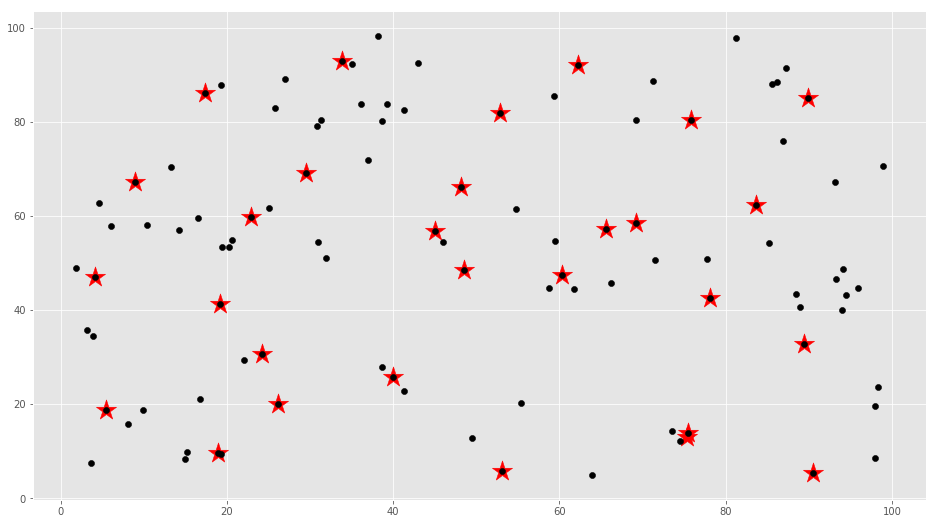

In [45]:
#print final fitness array
index_max_fit = np.argmax(fitness)
#print final chromosomes
final_chromosome = chrom[index_max_fit]
#print best chromosome out of the array
plt.scatter(final_chromosome[:,0], final_chromosome[:,1], c = 'red', marker = '*', s= 450)
plt.scatter(x[:,0],x[:,1],c='black',s=150, marker='.')
plt.show()

In [46]:
final_score = scorer(final_chromosome)
final_score

6996.599999999999

In [47]:
final_score / cov_area

0.7783426594431032